In [0]:
pip install wikipedia

###Question 1

In [0]:
import pandas as pd 
import wikipedia as wp
from bs4 import BeautifulSoup
import requests
import io

In [0]:
html = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")

In [0]:
df = pd.read_html(html, header = 0)[0]

In [0]:
df = df[df.Borough != 'Not assigned']

In [0]:
df = df.groupby(['Postal code', 'Borough'])['Neighborhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()

In [0]:
for index, row in df.iterrows():
    if row['Neighborhood'] == 'Not assigned':
        row['Neighborhood'] = row['Borough']

In [0]:
df

,Postal code,Borough,Neighborhood
0,M1B,Scarborough,Malvern / Rouge
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek
2,M1E,Scarborough,Guildwood / Morningside / West Hill
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
...,...,...,...
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,Kingsview Village / St. Phillips / Martin Grov...
101,M9V,Etobicoke,South Steeles / Silverstone / Humbergate / Jam...


In [0]:
df.shape

(103, 3)

###Question 2


In [0]:
url="http://cocl.us/Geospatial_data"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [20]:
c

,Postal code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


In [0]:
c.columns = ['Postal code', 'Latitude', 'Longitude']
df = pd.merge(c, df, on='Postal code')

In [24]:
df = df[['Postal code', 'Borough', 'Neighborhood', 'Latitude', 'Longitude']]
df

,Postal code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,Malvern / Rouge,43.806686,-79.194353
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek,43.784535,-79.160497
2,M1E,Scarborough,Guildwood / Morningside / West Hill,43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,Kingsview Village / St. Phillips / Martin Grov...,43.688905,-79.554724
101,M9V,Etobicoke,South Steeles / Silverstone / Humbergate / Jam...,43.739416,-79.588437


###Question 3

In [0]:
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt

In [0]:
pip install geopandas

In [26]:
df['Coordinates'] = list(zip(df.Longitude, df.Latitude))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
df['Coordinates'] = df['Coordinates'].apply(Point)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


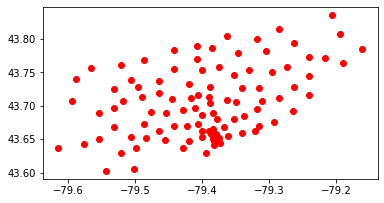

In [35]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
ax = cities[cities.name == "Toronto"].plot(
    color='white', edgecolor='black')

gdf.plot(ax=ax, color='red')
plt.show()